# **1. Perkenalan Dataset**

Dataset Heart Failure Prediction adalah dataset yang digunakan untuk memprediksi penyakit jantung berdasarkan fitur-fitur klinis. Dataset ini terdiri dari 918 data dengan 12 kolom, termasuk 11 fitur prediktif dan 1 kolom target. Dataset tersebut diperoleh dari kaggle. Berikut adalah rincian fitur-fitur yang ada:

1. Age (Usia): Usia pasien dalam tahun (numerik).
2. Sex (Jenis Kelamin): Jenis kelamin pasien, M (Male) atau F (Female) (kategorikal).
3. ChestPainType (Tipe Nyeri Dada): Jenis nyeri dada yang dialami pasien, dengan nilai:
    - TA: Typical Angina
    - ATA: Atypical Angina
    - NAP: Non-Anginal Pain
    - ASY: Asymptomatic
4. RestingBP (Tekanan Darah Istirahat): Tekanan darah saat istirahat dalam mm Hg (numerik).
5. Cholesterol (Kolesterol): Kadar kolesterol serum dalam mg/dL (numerik).
6. FastingBS (Gula Darah Puasa): Gula darah puasa, 1 jika >120 mg/dL, 0 jika sebaliknya (kategorikal).
7. RestingECG (Elektrokardiogram Istirahat): Hasil elektrokardiogram saat istirahat, dengan nilai:
    - Normal: Normal
    - ST: Memiliki kelainan gelombang ST-T
    - LVH: Left Ventricular Hypertrophy
8. MaxHR (Denyut Jantung Maksimum): Denyut jantung maksimum yang dicapai (numerik, antara 60-202).
9. ExerciseAngina (Angina akibat Olahraga): Angina yang dipicu oleh olahraga, Y (Yes) atau N (No) (kategorikal).
10. Oldpeak (Depresi ST): Depresi segmen ST yang diinduksi oleh olahraga relatif terhadap istirahat (numerik).
11. ST_Slope (Kemiringan Segmen ST): Kemiringan segmen ST selama puncak olahraga, dengan nilai:
    - Up: Naik
    - Flat: Datar
    - Down: Turun
12. HeartDisease (Penyakit Jantung): Variabel target, 1 jika pasien memiliki penyakit jantung, 0 jika tidak (kategorikal).

 **Sumber Dataset**: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import joblib

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('../heart_raw.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# **4. Exploratory Data Analysis (EDA)**

### Gambaran Dataset

Kode-kode di bawah akan menampilkan gambaran dari dataset yang digunakan, seperti tipe data dan analisis deskriptif.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


### Cek Data Missing

Fungsi berikut digunakan untuk mengecek data yang kosong.

In [5]:
def missing_values(df):
    # Masukan nilai yang memungkinkan missing
    missing_values = ['', ' ', 'NaN', 'Nan', 'nan','NULL','Null','null','N/A','n/a', '.', ',','-','--','---', 'TIDAK ADA DATA', 'KOSONG']
    col_names = list(df.columns)
    df[col_names] = df[col_names].replace(missing_values, np.nan)

    # Hitung jumlah data yang kosong
    missing_values = df.isnull().sum()
    missing_values = pd.DataFrame(missing_values, columns=['count'])
    missing_values.reset_index(inplace=True)
    return missing_values

In [6]:
missing_values(df)

,index,count
0,Age,0
1,Sex,0
2,ChestPainType,0
3,RestingBP,0
4,Cholesterol,0
5,FastingBS,0
6,RestingECG,0
7,MaxHR,0
8,ExerciseAngina,0
9,Oldpeak,0


Hasil pengecekan menunjukkan bahwa tidak terdapat data kosong.

### Cek Data Duplikat

Kode berikut untuk melihat berapa jumlah data duplikat.

In [7]:
print("Jumlah duplikat: ", df.duplicated().sum())

Jumlah duplikat:  0


Terlihat tidak ada data yang duplikat

### Distribusi Data

#### Distribusi Fitur Numerik

Kode berikut digunakan untuk melihat distribusi data numerik

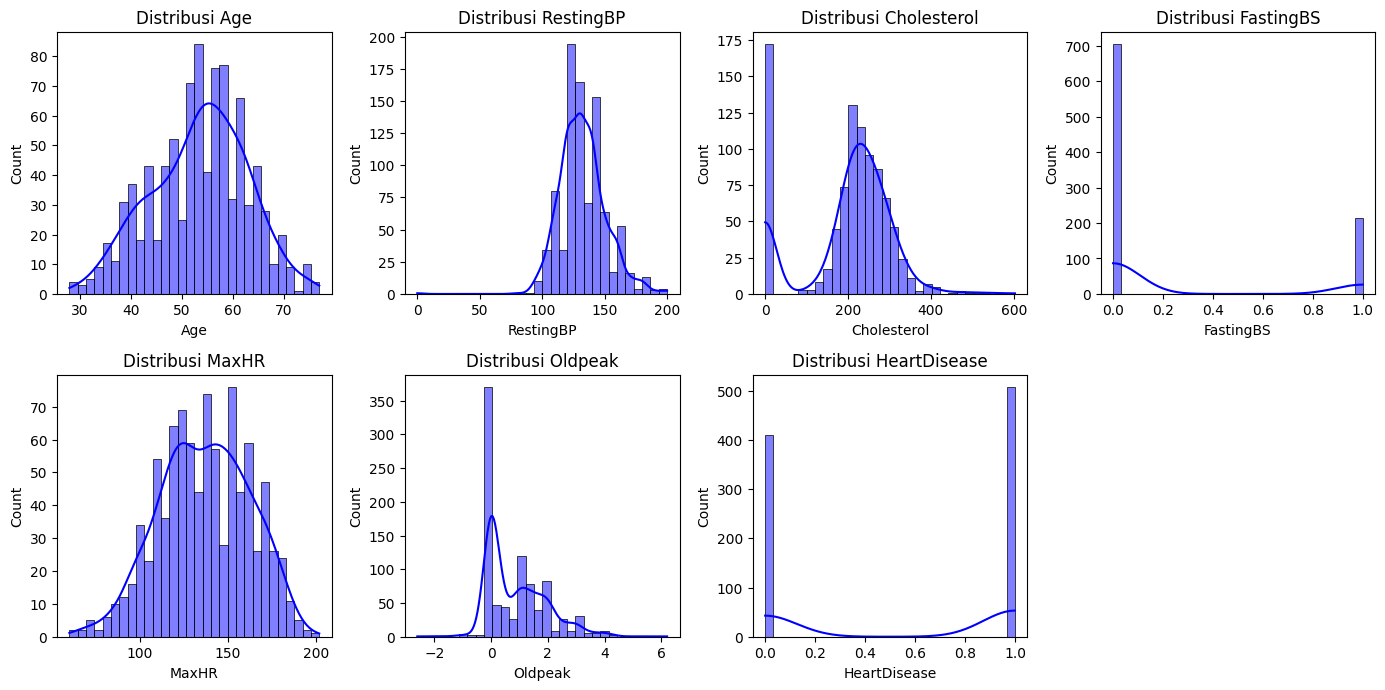

In [8]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Dari distribusi fitur numerik, terlihat bahwa fitur Age, RestingBP, dan MaxHR mendekati distribusi normal.

#### Distribusi Fitur Kategorikal

Kode berikut digunakan untuk melihat distribusi data kategorikal.

/tmp/ipykernel_1836/1140108556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_1836/1140108556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_1836/1140108556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipykernel_1836/1140108556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fa

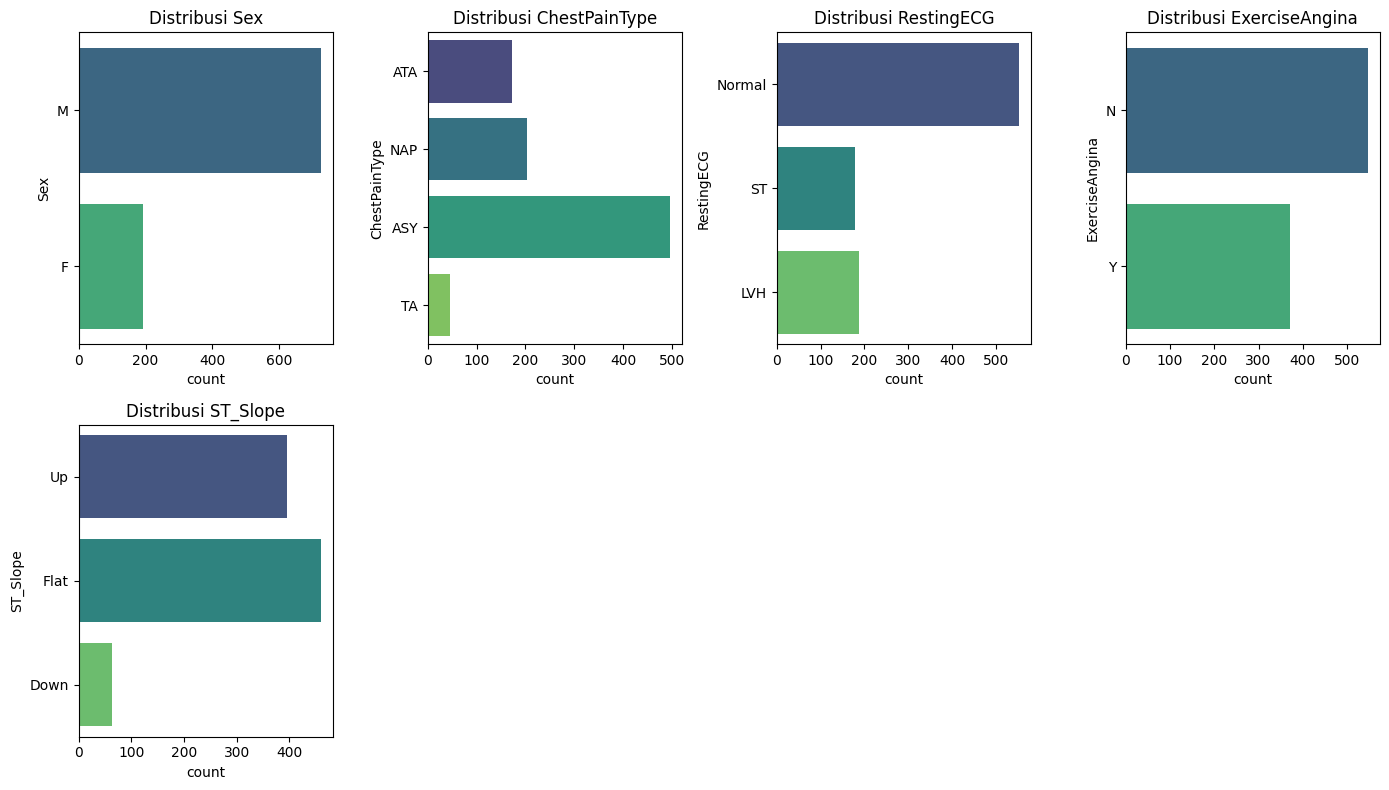

In [9]:
cat_features = df.select_dtypes(include=['object', 'category'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Dari distribusi fitur kategorikal, terlihat bahwa semua kategori memiliki nilai atau tidak ada kategori yang tidak muncul.

### Matrik Korelasi

Kode berikut digunakan untuk menampilkan korelasi antar fitur numerik.

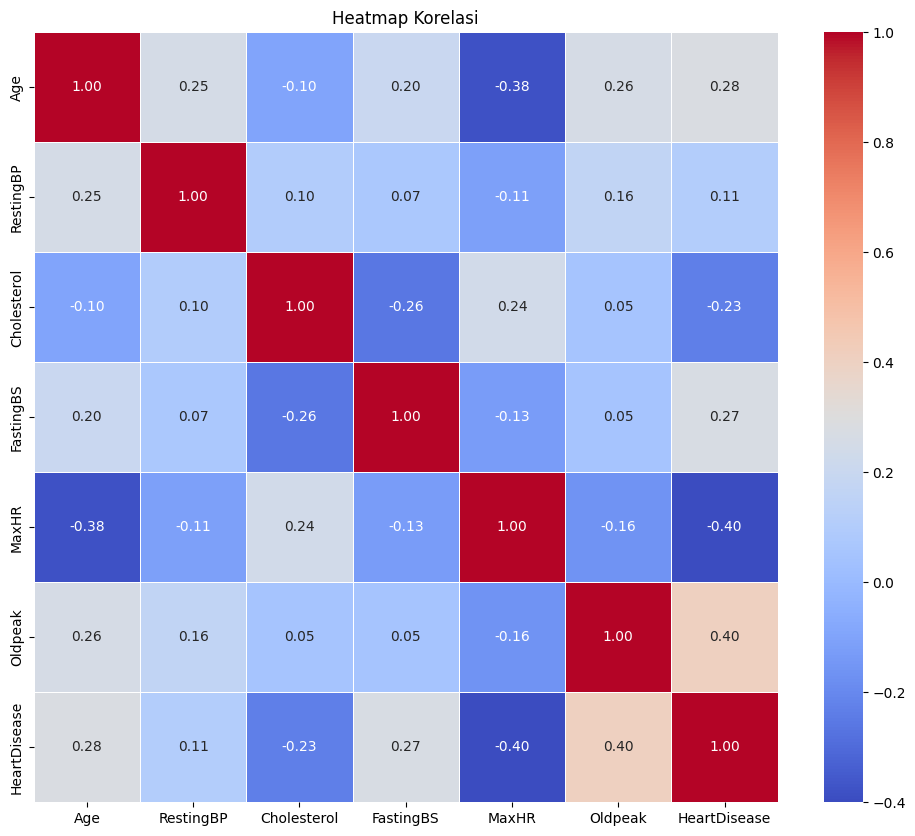

In [10]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Dari matrix korelasi di atas terlihat bahwa fitur Oldpeak cukup memiliki korelasi positif terhadap fitur HeardDisease. Sedangkan fitur MaxHR cukup memiliki korelasi negatif terhadap fitur HeardDisease.

### Distribusi Label

Kode berikut menampilkan distribusi jumlah data dari label untuk mengetahui apakah data label imblance atau tidak.

/tmp/ipykernel_1836/2922371353.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='viridis')


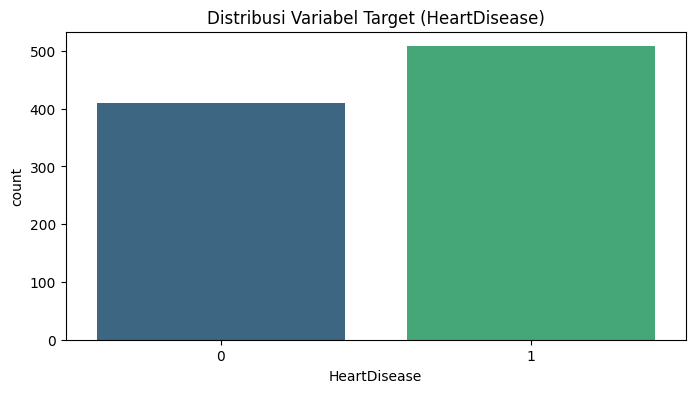

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='HeartDisease', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (HeartDisease)')
plt.show()

Dari distribusi di atas terlihat bahwa fitur lebel, yakni HeartDisease memiliki data yang imbalance yang tidak terlalu signifikan, sehingga tidak akan dilakukan proses balancing pada tahap preprocessing.

# **5. Data Preprocessing**

### One Hot Encoding

Kode berikut digunakan untuk mengubah fitur kategori menjadi sebuah kolom baru

In [12]:
kategori_fitur = df.select_dtypes(include=['object', 'category']).columns
encoded = pd.get_dummies(df, columns=kategori_fitur)
encoded = encoded.astype(int)
encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


### Normalisasi Data

Kode berikut digunakan untuk mengubah skala data.

In [13]:
# Contoh data (misalnya X adalah fitur, y adalah label)
X = encoded.drop(columns=['HeartDisease'])
y = encoded['HeartDisease']

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
scaled = pd.concat([scaled.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.727592,-0.515952,0.515952,-1.084138,2.075177,...,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.282891,1.938163,-1.938163,-1.084138,-0.481887,...,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.727592,-0.515952,0.515952,-1.084138,2.075177,...,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.282891,1.938163,-1.938163,0.922392,-0.481887,...,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.727592,-0.515952,0.515952,-1.084138,-0.481887,...,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.282891,-0.515952,0.515952,-1.084138,-0.481887,...,4.353909,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.303858,-0.515952,0.515952,0.922392,-0.481887,...,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.282891,-0.515952,0.515952,0.922392,-0.481887,...,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.727592,1.938163,-1.938163,-1.084138,2.075177,...,-0.229679,1.970528,-1.228087,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,1


Kode berikut digunakan untuk menyimpan skala data.

In [14]:

# Simpan scaler ke file 'scaler.joblib'
joblib.dump(scaler, './scaler.joblib')

['./scaler.joblib']

Kode berikut digunakan untuk menyimpan hasil skala data.

In [15]:
scaled.to_csv('./heart_preprocessing/heart_preprocessing.csv')

### Spliting Data

Kode berikut digunakan untuk membagi dataset menjadi data training sebesar 70% dan data testing sebesar 30%.

In [16]:
X = scaled.drop(columns=['HeartDisease'])  # Fitur
y = scaled['HeartDisease']  # Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Kode berikut digunakan untuk menyimpan hasil spliting data.

In [17]:
X_train.to_csv('./heart_preprocessing/X_train.csv')
X_test.to_csv('./heart_preprocessing/X_test.csv')
y_train.to_csv('./heart_preprocessing/y_train.csv')
y_test.to_csv('./heart_preprocessing/y_test.csv')